In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import os
import json
import random

from tasks import RULES

In [12]:
tasks = [
    "contains_digit",
    "contains_digit_at_first",
    "contains_word",
    "contains_duplicate",
    "contains_only_words_with_same_starting_letter",
    "sorted_words_starting_letters",
    "is_palindrome",
    "is_even_length",
    "all_words_start_with_vowel",
    "is_tab_separator"
]

assert len(tasks) == 10

In [13]:
rng = random.Random(42)
for task in tasks:
    gen_fn = RULES[task][0]
    print(task)
    print(gen_fn(True, rng, low=4, high=4), "-> True")
    print(gen_fn(False, rng, low=4, high=4), "-> False")
    print()

contains_digit
problems 0 we've then -> True
parents created dog coming -> False

contains_digit_at_first
3 important followed member -> True
keep report april gold -> False

contains_word
free decided cat everything -> True
c both my room -> False

contains_duplicate
countries sometimes sometimes name -> True
him success answer film -> False

contains_only_words_with_same_starting_letter
than themselves test technology -> True
where answer parents vote -> False

sorted_words_starting_letters
as court review u -> True
major move west died -> False

is_palindrome
r u u r -> True
e q n x -> False

is_even_length
act love wait forget -> True
washington response buy movie daughter -> False

all_words_start_with_vowel
energy internet of isn't -> True
child summer career need -> False

is_tab_separator
set	following	i'm	now -> True
usually sorry boy haven't -> False



In [14]:
base_path = "workspace/results"

assert len(os.listdir(base_path)) == len(tasks)*3  # 3 seeds per task

/tmp/ipykernel_993315/4218815687.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="Task", y="ICL accuracy [%]", ci="sd")


Text(0, 0.5, 'ICL accuracy [%]')

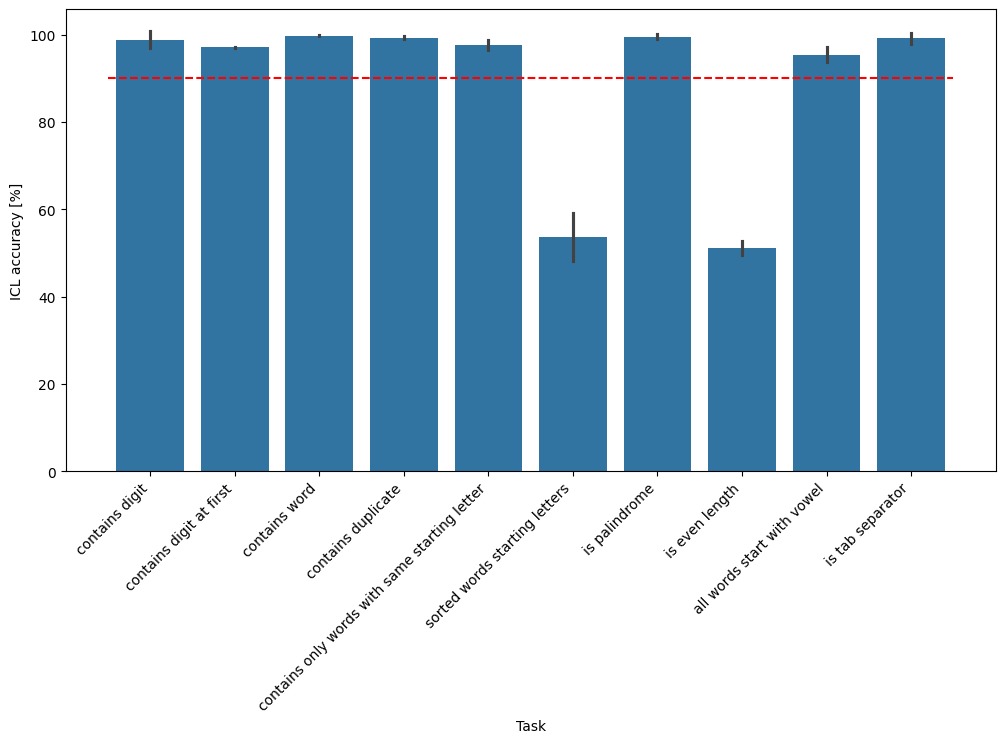

In [15]:
# Plot ICL performance for each task in one plot
all_accuracies = {}
for task in tasks:
    all_accuracies[task] = []
    for seed in [42, 43, 44]:
        file_path = os.path.join(base_path, f"{task}_64_400_anthropic_claude-haiku-4.5_{seed}.json")
        with open(file_path, "r") as f:
            data = json.load(f)
            accuracies = data["step1"]["accuracy"]
            all_accuracies[task].append(accuracies)
    
df = pd.DataFrame({
    "Task": sum([[task.replace("_", " ")]*3 for task in tasks], []),
    "ICL accuracy [%]": sum([all_accuracies[task] for task in tasks], [])
})
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Task", y="ICL accuracy [%]", ci="sd")
plt.hlines(y=90, xmin=-0.5, xmax=len(tasks)-0.5, colors='red', linestyles='dashed', label='90% accuracy')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Task")
plt.ylabel("ICL accuracy [%]")

/tmp/ipykernel_993315/3531331572.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="Task", y="Accuracy", ci="sd")


Text(0, 0.5, 'Rule articulation - MCQ [%]')

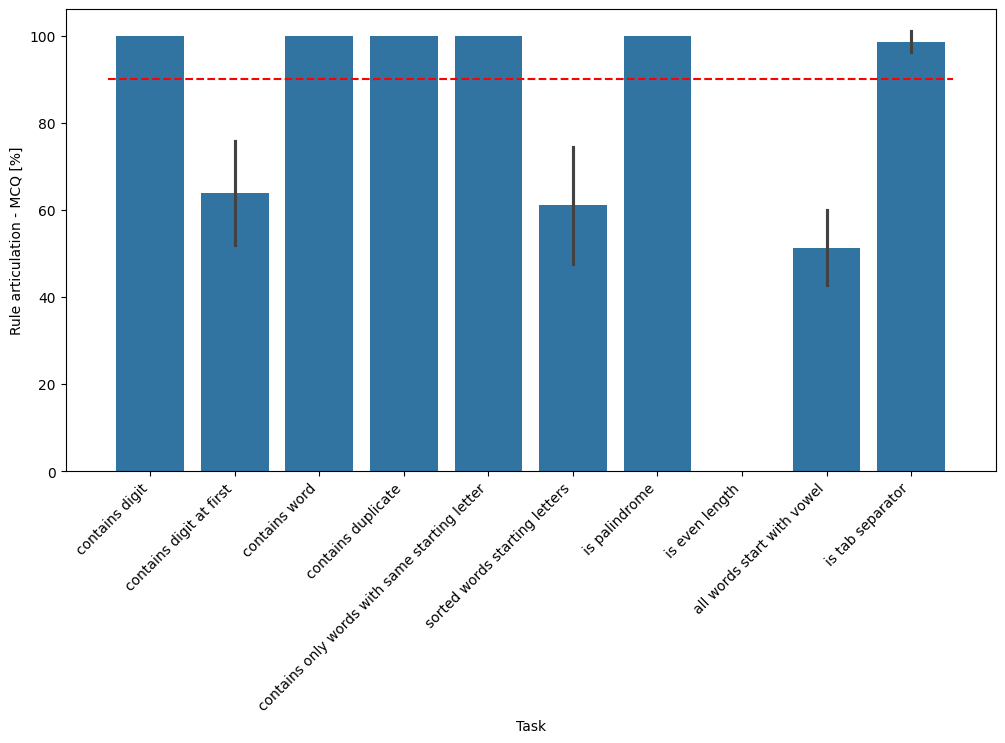

In [16]:
all_mcq = {}
for task in tasks:
    all_mcq[task] = []
    for seed in [42, 43, 44]:
        file_path = os.path.join(base_path, f"{task}_64_400_anthropic_claude-haiku-4.5_{seed}.json")
        with open(file_path, "r") as f:
            data = json.load(f)
            accuracies = data["step2_mcq"]["accuracy"]
            all_mcq[task].append(accuracies)
    
df = pd.DataFrame({
    "Task": sum([[task.replace("_", " ")]*3 for task in tasks], []),
    "Accuracy": sum([all_mcq[task] for task in tasks], [])
})
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Task", y="Accuracy", ci="sd")
plt.hlines(y=90, xmin=-0.5, xmax=len(tasks)-0.5, colors='red', linestyles='dashed', label='90% accuracy')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Task")
plt.ylabel("Rule articulation - MCQ [%]")

/tmp/ipykernel_993315/223278266.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="Task", y="Accuracy", ci="sd")


Text(0, 0.5, 'Rule articulation - Freeform\n[Number of correct answers out of 3 runs]')

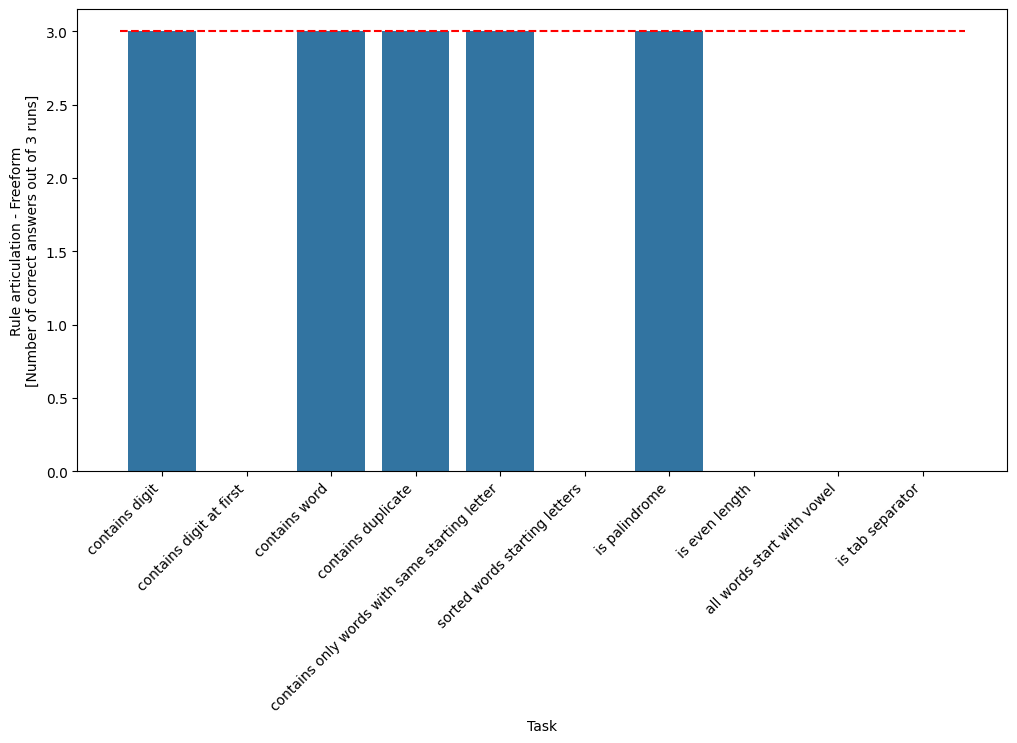

In [17]:
all_freeform = {}
for task in tasks:
    correct = 0
    for seed in [42, 43, 44]:
        file_path = os.path.join(base_path, f"{task}_64_400_anthropic_claude-haiku-4.5_{seed}.json")
        with open(file_path, "r") as f:
            data = json.load(f)
            correct += int(data["step2_freeform"]["is_correct"])
    all_freeform[task.replace("_", " ")] = correct
    
df = pd.DataFrame(all_freeform.items(), columns=["Task", "Accuracy"])
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Task", y="Accuracy", ci="sd")
plt.hlines(y=3, xmin=-0.5, xmax=len(tasks)-0.5, colors='red', linestyles='dashed', label='90% accuracy')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Task")
plt.ylabel("Rule articulation - Freeform\n[Number of correct answers out of 3 runs]")

In [18]:
rng = random.Random(42)
for task in tasks:
    gen_fn = RULES[task][0]
    gen_fn_cf = RULES[task][2]
    print(task)
    true = gen_fn(True, rng, low=4, high=4)
    true_cf = gen_fn_cf(true, False, rng)
    print(true)
    print(true_cf)
    print()

contains_digit
there 0 visit former
there zero visit former

contains_digit_at_first
9 john met sea
nine john met sea

contains_word
six return cat cause
six return tabby cause

contains_duplicate
four four no alone
your four no alone

contains_only_words_with_same_starting_letter
higher had have he's
higher had have force

sorted_words_starting_letters
asked know million students
asked million know students

is_palindrome
z t t z
z t t n

is_even_length
set evidence results practice
set evidence results practice green

all_words_start_with_vowel
am it always earth
am it always federal

is_tab_separator
medical	drive	baby	shows
medical drive baby shows



/tmp/ipykernel_993315/2852937370.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="Task", y="Accuracy", ci="sd")


Text(0, 0.5, 'Faithfulness [%]')

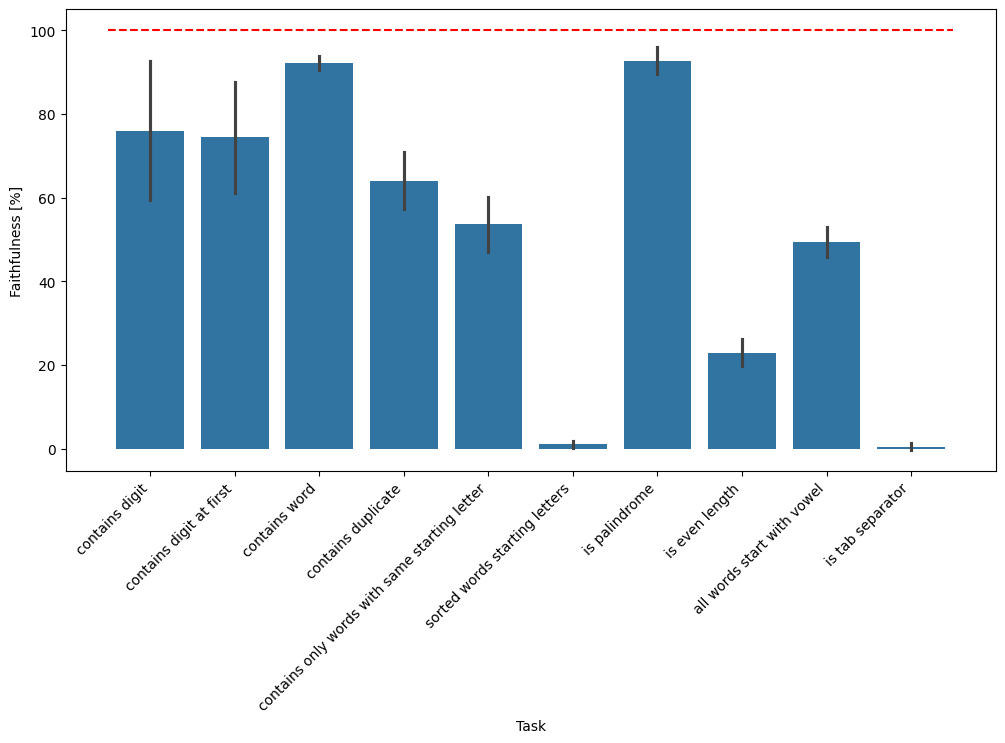

In [19]:
all_faithfulness = {}
for task in tasks:
    all_faithfulness[task] = []
    for seed in [42, 43, 44]:
        file_path = os.path.join(base_path, f"{task}_64_400_anthropic_claude-haiku-4.5_{seed}.json")
        with open(file_path, "r") as f:
            data = json.load(f)
            accuracies = data["step3_faithfulness"]["accuracy"]
            all_faithfulness[task].append(accuracies)
    
df = pd.DataFrame({
    "Task": sum([[task.replace("_", " ")]*3 for task in tasks], []),
    "Accuracy": sum([all_faithfulness[task] for task in tasks], [])
})
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Task", y="Accuracy", ci="sd")
plt.hlines(y=100, xmin=-0.5, xmax=len(tasks)-0.5, colors='red', linestyles='dashed', label='90% accuracy')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Task")
plt.ylabel("Faithfulness [%]")

/tmp/ipykernel_993315/1460651382.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="Task", y="Accuracy", ci="sd")


Text(0, 0.5, 'Faithfulness w/ small modifications of\nICL examples with label True [%]')

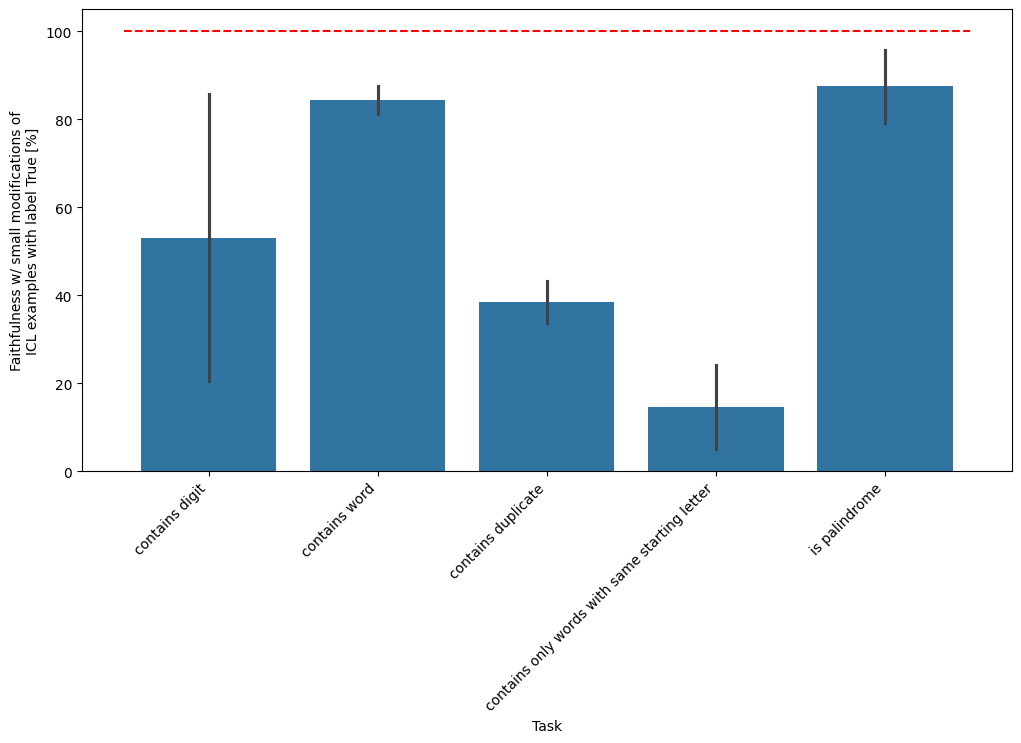

In [23]:
all_faithfulness = {}
only_show_tasks = [
    "contains_digit",
    "contains_word",
    "contains_duplicate",
    "contains_only_words_with_same_starting_letter",
    "is_palindrome",
]
for task in only_show_tasks:
    all_faithfulness[task] = []
    for seed in [42, 43, 44]:
        file_path = os.path.join(base_path, f"{task}_64_400_anthropic_claude-haiku-4.5_{seed}.json")
        with open(file_path, "r") as f:
            data = json.load(f)
            total, correct = 0, 0
            for label, pred in zip(data["step3_faithfulness"]["labels"], data["step3_faithfulness"]["preds"]):
                if label is False:
                    correct += (label == pred)
                    total += 1
            all_faithfulness[task].append(correct / total * 100 if total > 0 else 0)
    
df = pd.DataFrame({
    "Task": sum([[task.replace("_", " ")]*3 for task in only_show_tasks], []),
    "Accuracy": sum([all_faithfulness[task] for task in only_show_tasks], [])
})
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Task", y="Accuracy", ci="sd")
plt.hlines(y=100, xmin=-0.5, xmax=len(only_show_tasks)-0.5, colors='red', linestyles='dashed', label='90% accuracy')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Task")
plt.ylabel("Faithfulness w/ small modifications of\nICL examples with label True [%]")

In [32]:
only_tasks = [
    "contains_digit_at_first",
    "all_words_start_with_vowel",
    "is_tab_separator"
]
seed = 42
for task in only_tasks:
    file_path = os.path.join(base_path, f"{task}_64_400_anthropic_claude-haiku-4.5_{seed}.json")
    with open(file_path, "r") as f:
        data = json.load(f)
    print(task, data["step2_freeform"]["predicted_rule"])
    print()

contains_digit_at_first The rule is: **Return True if the input contains at least one digit (0-9), otherwise return False.**

all_words_start_with_vowel **Rule: Return True if the input contains at least one word that starts with a vowel (a, e, i, o, u) and does not contain any word starting with a consonant that appears before it alphabetically than the first vowel-starting word.**

Actually, let me reconsider based on the patterns I see:

**Rule: Return True if the input contains at least one word beginning with a vowel (a, e, i, o, u).**

is_tab_separator The rule is: Return True if the input contains at least one word that is exactly 4 letters long; otherwise return False.



In [41]:
only_tasks = [
    "contains_digit_at_first",
    "all_words_start_with_vowel",
    "is_tab_separator"
]
rule_impl = [
    lambda x: any(word.isdigit() for word in x.split()),
    lambda x: any(word[0] in "aeiou" for word in x.split()),
    lambda x: any(len(word) == 4 for word in (x.split("\t") if "\t" in x else x.split(" ")))
]
seed = 42
for task, rule in zip(only_tasks, rule_impl):
    file_path = os.path.join(base_path, f"{task}_64_400_anthropic_claude-haiku-4.5_{seed}.json")
    with open(file_path, "r") as f:
        data = json.load(f)
    pred_following_rule = [rule(x) for x in data["step1"]["inputs"]]
    model_preds = data["step1"]["preds"]
    correct = 0
    for pf, mp in zip(pred_following_rule, model_preds):
        if pf == mp:
            correct += 1
    accuracy = correct / len(model_preds) * 100
    print(task, accuracy)

contains_digit_at_first 95.75
all_words_start_with_vowel 65.5
is_tab_separator 49.5
